In [ ]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd

# data visulization
import seaborn as sns
import matplotlib.pyplot as plt

# text processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer


nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
import sklearn

!pip install emoji



E: Package 'libfluidsynth1' has no installation candidate
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 #printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
cols=['tweetid', 'entity', 'target', 'content']


In [ ]:
data1=pd.read_csv("/content/twitter_training.csv",names=cols)
data2=pd.read_csv("/content/twitter_validation.csv",names=cols)
data=pd.concat([data1,data2])



In [ ]:
data.head()




,tweetid,entity,target,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
#checking the number of row and columns
data.shape




(75682, 4)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweetid  75682 non-null  int64 
 1   entity   75682 non-null  object
 2   target   75682 non-null  object
 3   content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


To check null values

In [ ]:
data.isna().sum()

tweetid      0
entity       0
target       0
content    686
dtype: int64

In variable content there are 686 null values

In [ ]:
#drop null values'
data.dropna(inplace=True)

check duplicate values

In [ ]:
data.duplicated().sum()

2857

In [ ]:
#drop duplicates
data.drop_duplicates(inplace=True)

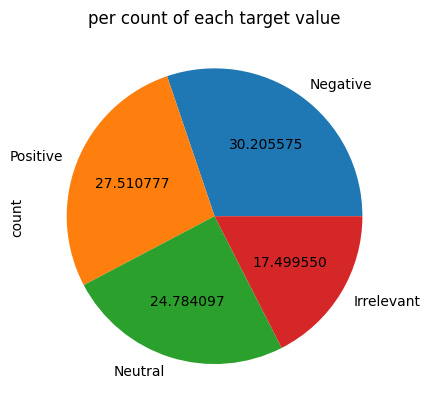

In [ ]:
#count of target values
data['target'].value_counts().plot(kind='pie',autopct='%2f')
plt.title("per count of each target value")
plt.show()

In [ ]:
target_count=data['target'].value_counts().reset_index()
target_count

,target,count
0,Negative,21790
1,Positive,19846
2,Neutral,17879
3,Irrelevant,12624


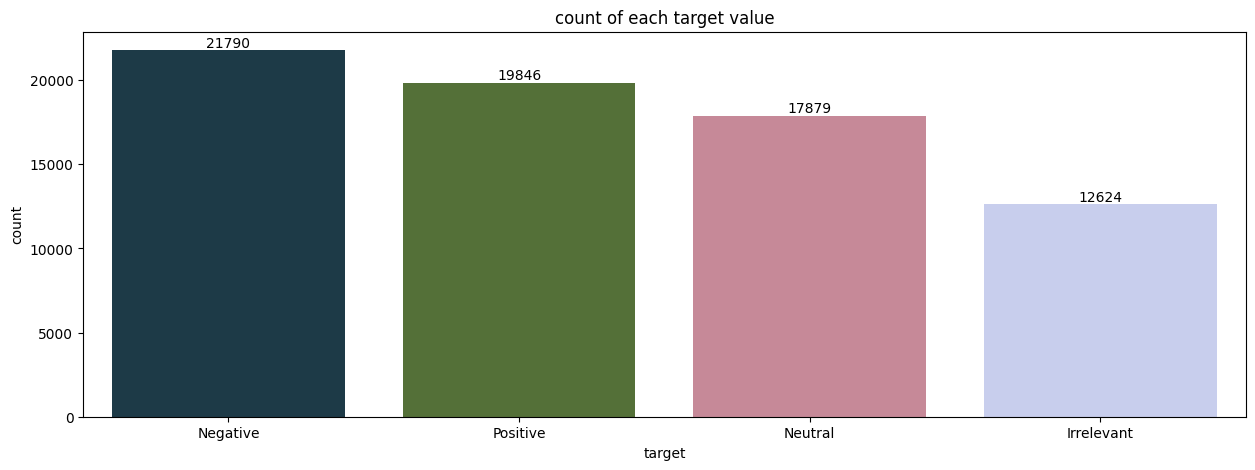

In [ ]:
plt.figure(figsize=(15,5))
ad=sns.barplot(data=target_count,x='target',y='count',palette='cubehelix')
for bars in ad.containers:
  ad.bar_label(bars)
plt.title("count of each target value")
plt.show()

In [ ]:
#tweet count of each user
tweet_count=data.groupby('tweetid')['target'].count().sort_values(ascending=False).reset_index()
tweet_count=tweet_count.rename(columns={'target':'count'})
tweet_count

,tweetid,count
0,8371,7
1,8846,7
2,2752,7
3,10429,7
4,2131,7
...,...,...
12442,4717,2
12443,5647,2
12444,5603,2
12445,3108,2


In [ ]:
#feature engineering
#char count
data['char_count']=data['content'].apply(len)
#word count
data['word_count']=data['content'].apply(lambda x:len(nltk.word_tokenize(x)))
#sentence count
data['sent_count']=data['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

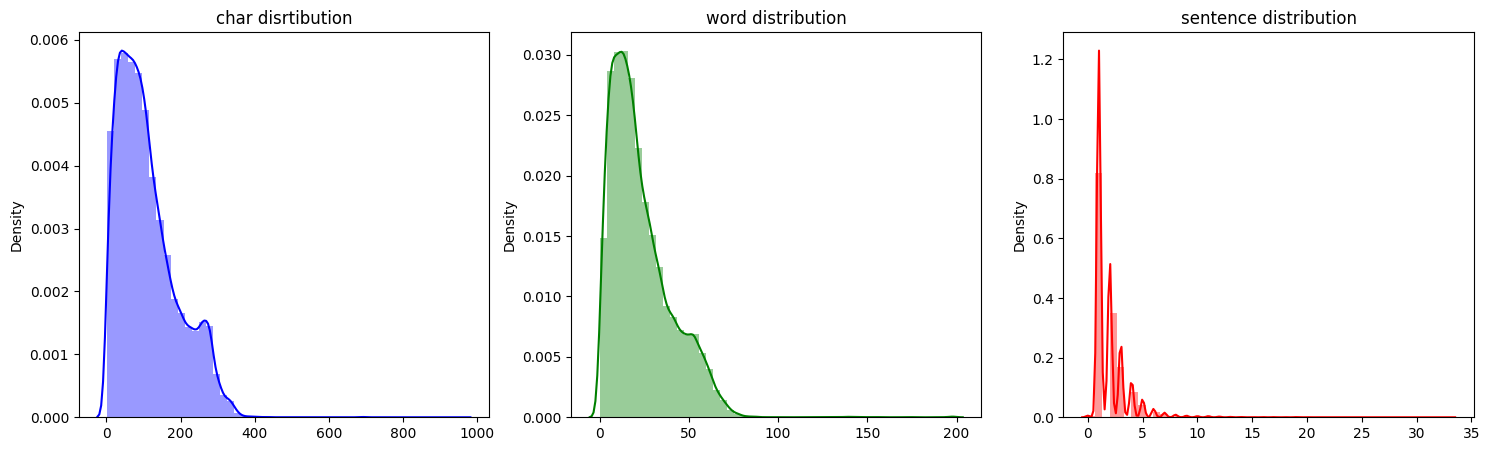

In [ ]:
#distribution plots
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.distplot(ax=axes[0],x=data['char_count'],color='b')
axes[0].set_title('char disrtibution')

sns.distplot(ax=axes[1],x=data['word_count'],color='g')
axes[1].set_title('word distribution')

sns.distplot(ax=axes[2],x=data['sent_count'],color='r')
axes[2].set_title("sentence distribution")
plt.show()

In [ ]:
#droping unnecessary columns
df=data.drop(columns=['tweetid','entity'])

In [ ]:
df.head()

,target,content,char_count,word_count,sent_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [ ]:
#removing emojis from tewwts
# remove emoji
import emoji

df['content']=df['content'].apply(lambda x: emoji.replace_emoji(x,replace=''))

Text preprocessing
lowercase
remove punctuatuation
remove stopwords
steaming

In [ ]:
ps=PorterStemmer()

In [ ]:
def preprocessing(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  full_text=[]
  for i in text:
    if i not in string.punctuation and i not in stopwords.words('english'):
      full_text.append(ps.stem(i))
  return ' '.join(full_text)

In [ ]:
df['content']=df['content'].apply(preprocessing)


In [ ]:
df.head()

,target,content,char_count,word_count,sent_count
0,Positive,im get borderland murder,53,11,1
1,Positive,come border kill,51,13,1
2,Positive,im get borderland kill,50,11,1
3,Positive,im come borderland murder,51,11,1
4,Positive,im get borderland 2 murder,57,13,1


In [ ]:
df.duplicated().sum()

2963

In [ ]:
df=df.drop_duplicates()

EDA

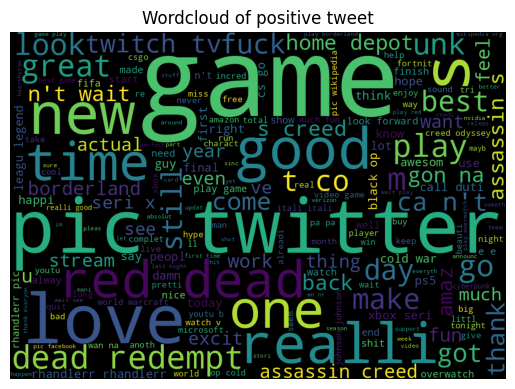

In [ ]:
#word cloud for positive  tweets
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
positive=wc.generate(df[df['target']=='Positive']['content'].str.cat(sep=''))
plt.title('Wordcloud of positive tweet')
plt.axis('off')
plt.imshow(positive)
plt.show()

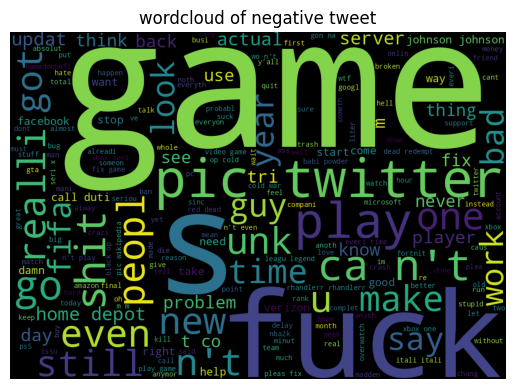

In [ ]:
#word cloud for negative tweets
wc=WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
negative=wc.generate(df[df['target']=='Negative']['content'].str.cat(sep=''))
plt.title('wordcloud of negative tweet')
plt.axis('off')
plt.imshow(negative)
plt.show()

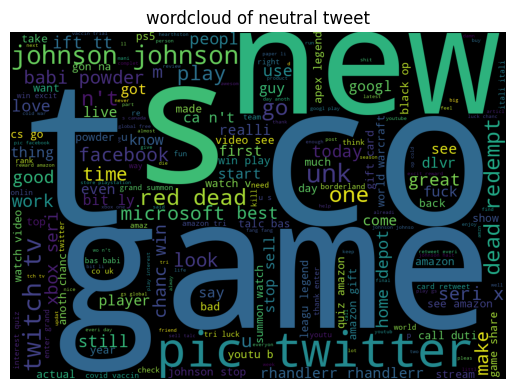

In [ ]:
#word cloud for neutral tweets
wc=WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
neutral=wc.generate(df[df['target']=='Neutral']['content'].str.cat(sep=''))
plt.title('wordcloud of neutral tweet')
plt.axis('off')
plt.imshow(neutral)
plt.show()

In [ ]:
def pre(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text).strip()
    return text

In [ ]:
df['content']=df['content'].apply(pre)

In [ ]:
df.duplicated().sum()

156

In [ ]:
df=df.drop_duplicates()

In [ ]:
#most common words in positive tweets
positive=[]
for txt in df[df['target']=='Positive']['content'].tolist():
  for word in txt.split():
       positive.append(word)

In [ ]:
len(positive)

196052

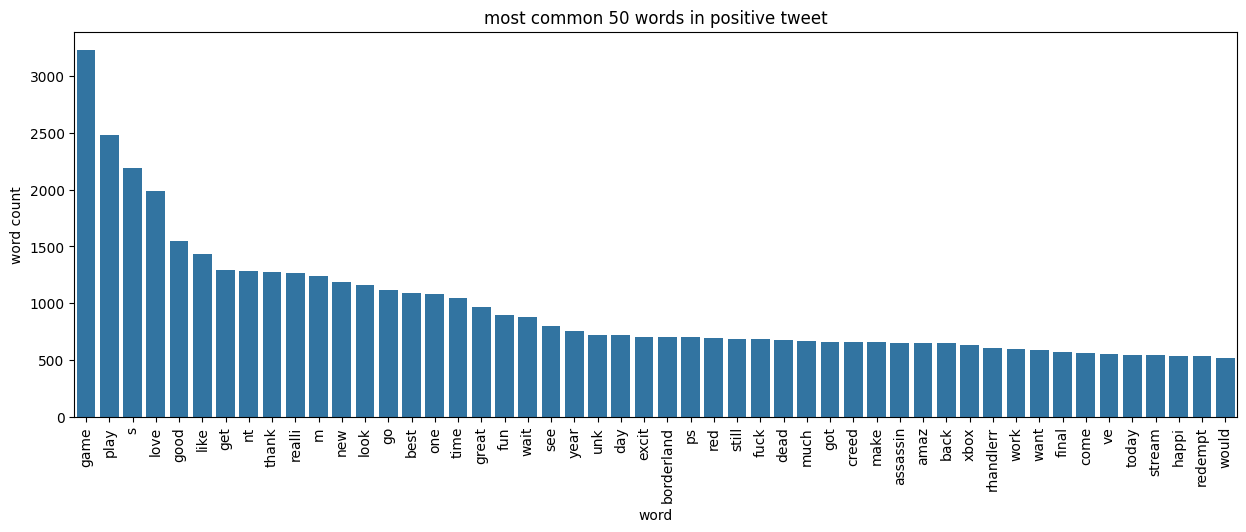

In [ ]:
#plot most 50 common words from positive tweets
from collections import Counter

plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(positive).most_common(50))[0],y=pd.DataFrame(Counter(positive).most_common(50))[1])
plt.xlabel('word')
plt.ylabel('word count')
plt.title("most common 50 words in positive tweet")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#most common words in negative tweets
negative=[]
for txt in df[df['target']=='Negative']['content'].tolist():
  for word in txt.split():
       negative.append(word)

In [ ]:
len(negative)

244563

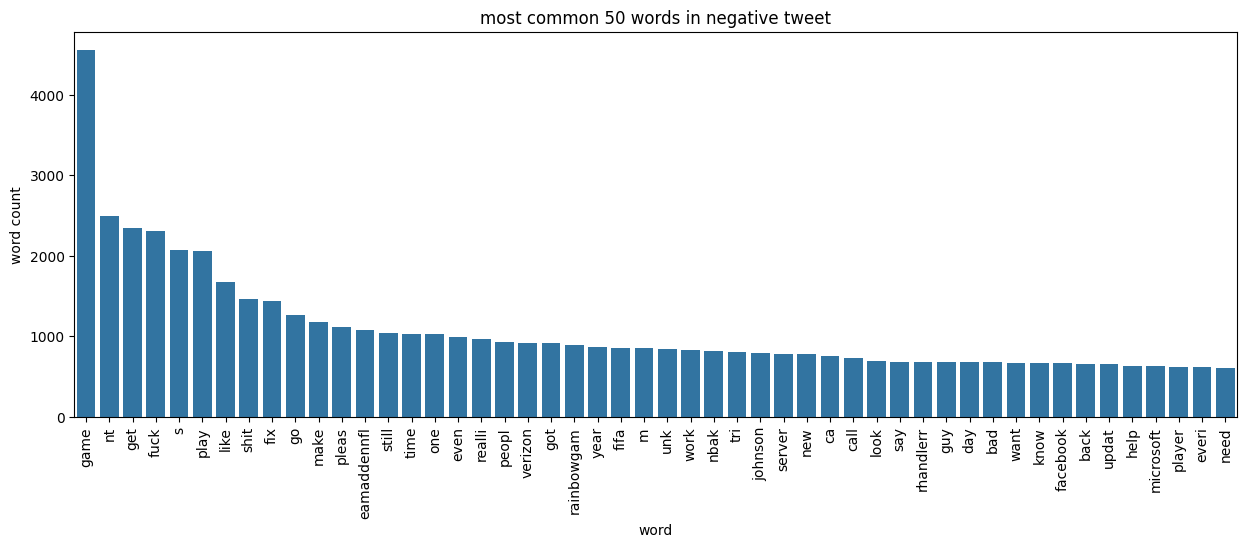

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(negative).most_common(50))[0],y=pd.DataFrame(Counter(negative).most_common(50))[1])
plt.xlabel('word')
plt.ylabel('word count')
plt.title("most common 50 words in negative tweet")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#most common words in neutral tweets
neutral=[]
for txt in df[df['target']=='Neutral']['content'].tolist():
  for word in txt.split():
       neutral.append(word)


In [ ]:
len(neutral)

210002

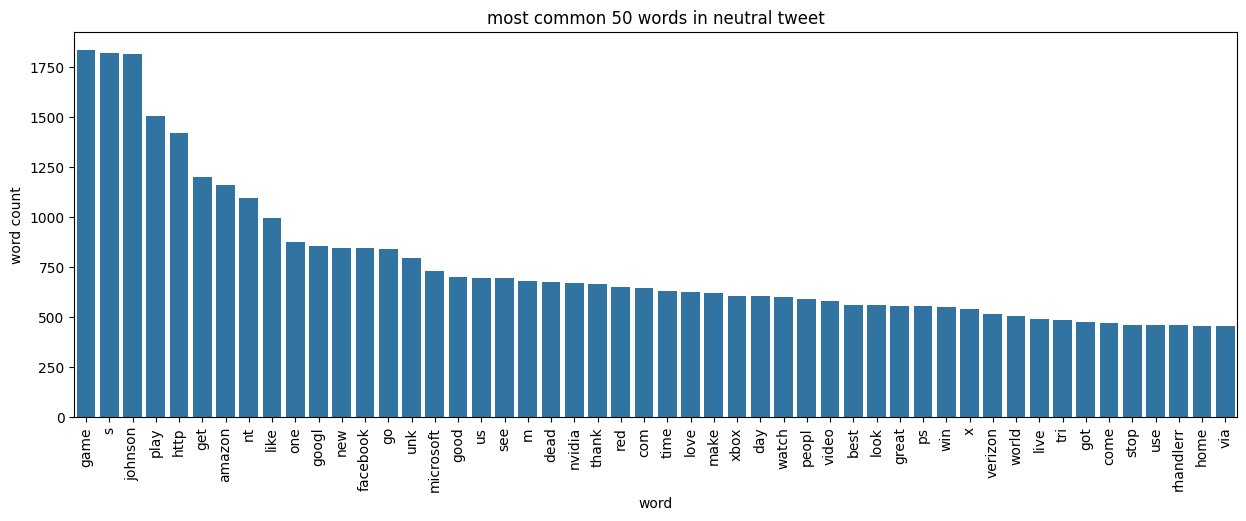

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(neutral).most_common(50))[0],y=pd.DataFrame(Counter(neutral).most_common(50))[1])
plt.xlabel("word")
plt.ylabel("word count")
plt.title("most common 50 words in neutral tweet")
plt.xticks(rotation=90)
plt.show()

In [ ]:
irrelevant=[]
for txt in df[df['target']=='Irrelevant']['content'].tolist():
  for word in txt.split():
     irrelevant.append(word)
len(irrelevant)


138683

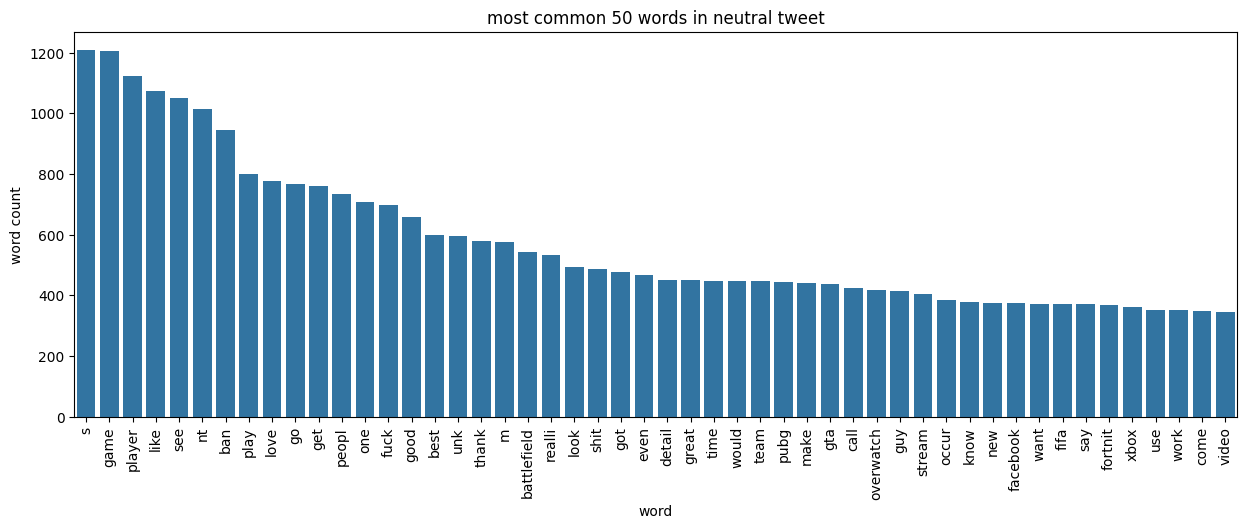

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(irrelevant).most_common(50))[0],y=pd.DataFrame(Counter(irrelevant).most_common(50))[1])
plt.xlabel("word")
plt.ylabel("word count")
plt.title("most common 50 words in neutral tweet")
plt.xticks(rotation=90)
plt.show()

Label encoding
positive=1
negative=0
neutral=2
irrelevant=3

In [ ]:
df['sentiment']=df['target'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})

Extract input and target data

In [ ]:
x=df['content']
y=df['sentiment']

Splitting data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Pipeline

In [ ]:
# step-1 convert text data into numeric
# step-2 apply RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


sentiment_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('rfc',RandomForestClassifier(random_state=42))
])

In [ ]:
# fit the data into pipeline
sentiment_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(random_state=42))])

Model Evaluation

In [74]:
y_pred = sentiment_pipeline.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9203129527673138


<function matplotlib.pyplot.show(close=None, block=None)>

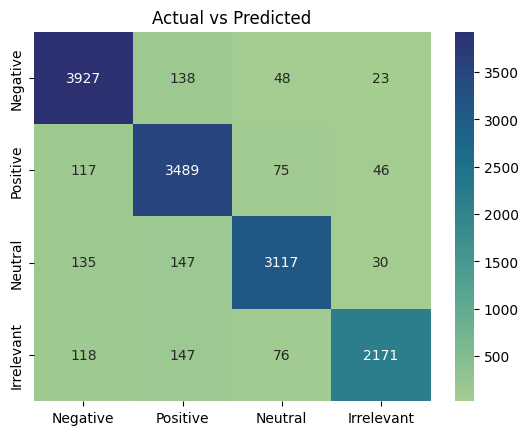

In [77]:
label=['Negative','Positive','Neutral','Irrelevant']
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels=label,yticklabels=label,annot=True,fmt='d',cmap='crest')
plt.title("Actual vs Predicted")
plt.show

In [79]:
from sklearn.naive_bayes import MultinomialNB
mnb_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('mnb',MultinomialNB())
])

In [80]:
mnb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [82]:
mnb_pred = mnb_pipeline.predict(x_test)
print(accuracy_score(y_test,mnb_pred))

0.7037815126050421


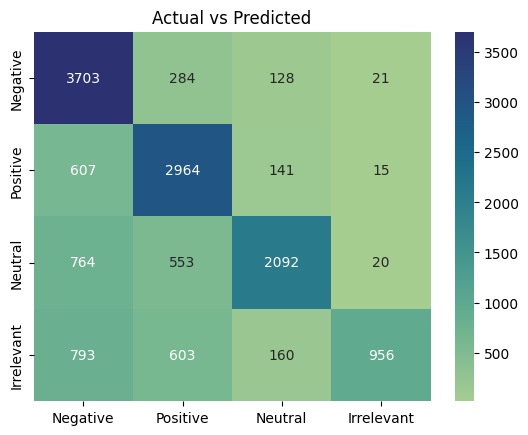

In [83]:
label = ['Negative','Positive','Neutral','Irrelevant']
sns.heatmap(confusion_matrix(y_test,mnb_pred),xticklabels=label,yticklabels=label,annot=True,fmt='d',cmap='crest')
plt.title('Actual vs Predicted')
plt.show()

In [84]:
lr_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('lr',LogisticRegression(penalty=None,solver='sag',max_iter=500))
])

In [85]:
lr_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(max_iter=500, penalty=None, solver='sag'))])

In [87]:
lr_pred = lr_pipeline.predict(x_test)
print(accuracy_score(y_test,lr_pred))

0.8183135323094756


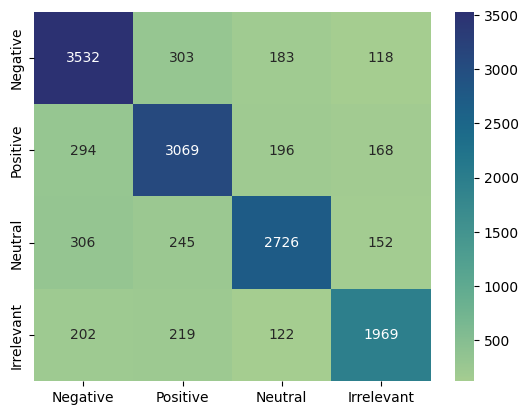

In [88]:
label = ['Negative','Positive','Neutral','Irrelevant']

sns.heatmap(confusion_matrix(y_test,lr_pred),xticklabels=label,yticklabels=label,annot=True,fmt='d',cmap='crest')
plt.show()

In [89]:
import pickle
pickle.dump(sentiment_pipeline,open('rfc_sentiment_model','wb'))